# Análisis exploratorio de datos.

El siguiente proyecto se enfocó en analizar datos de viajes compartidos proporcionada por la empresa Zuber ubicado en Chicago. Estos datos se obtuvieron de una base datos, se analizaron los datos de competidores y se probró una hipótesis sobre el impacto del clima en la frecuancia de los viajes.

## Paso 1. Inicialización.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### Cargar los datos

Cargar los archivos que pbtuvimos de `SQL` y estudiar la información general.

In [2]:
company_trips = pd.read_csv('./7_gitignore/moved_project_sql_result_01.csv')
dropoff_trips = pd.read_csv('./7_gitignore/moved_project_sql_result_04.csv')

## Paso 2. Preparar los datos.

Visualización de los datos para asegurarnos que cargaron correctamente y como están elaborados.

In [3]:
company_trips.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [4]:
dropoff_trips.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [5]:
company_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [6]:
dropoff_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Formatear la columna `average_trips` con dos decimales únicamente.

In [7]:
dropoff_trips['average_trips'] = round(dropoff_trips['average_trips'],2)
print(dropoff_trips.sample(5))

   dropoff_location_name  average_trips
77        Archer Heights           8.37
11          East Village        1212.07
41            North Park          67.83
5              Lake View        2420.97
66       Washington Park          16.03


En este paso, prepración de los datos, cargamos los datos y observamos su información general para asegurarnos de que se carguen correctamnete, los tipos de datos sean correctos y no tuvieran valores nulos. El primer dataset `company_trips` está distribuido por 63 registros y 2 campos; `company_name` (valores de tipos objecto **object**) y `trips_amount` (valores de tipo **int64**). El segundo dataset, `dropoff_trips` está distribuido por 94 registros y 2 campos; `dropoff_location_name` (**object**) y `average_trips` (**float64**). El único prerocesamiento de datos que se ejecutó fue formatear la columna `average_trips` a dos decimales únicamente.

## **Paso 3. Visualización de los datos.**

En este paso identificaremos:
- Los 10 principales barrios en términos de finalización del recorrido.
- Empresas de taxis y números de viajes, los 10 barrios princiaples por número de finalizaciones.
- Consluiones generales.

### Descripción estadística general

In [8]:
company_trips.describe(include='all')

,company_name,trips_amount
count,64,64.000000
unique,64,NaN
top,Flash Cab,NaN
freq,1,NaN
mean,NaN,2145.484375
std,NaN,3812.310186
min,NaN,2.000000
25%,NaN,20.750000
50%,NaN,178.500000
75%,NaN,2106.500000


In [9]:
dropoff_trips.describe(include='all')

,dropoff_location_name,average_trips
count,94,94.000000
unique,94,NaN
top,Loop,NaN
freq,1,NaN
mean,NaN,599.953830
std,NaN,1714.591706
min,NaN,1.800000
25%,NaN,14.265000
50%,NaN,52.015000
75%,NaN,298.855000


### 10 principales barrios en términos de finalización del recorrido.

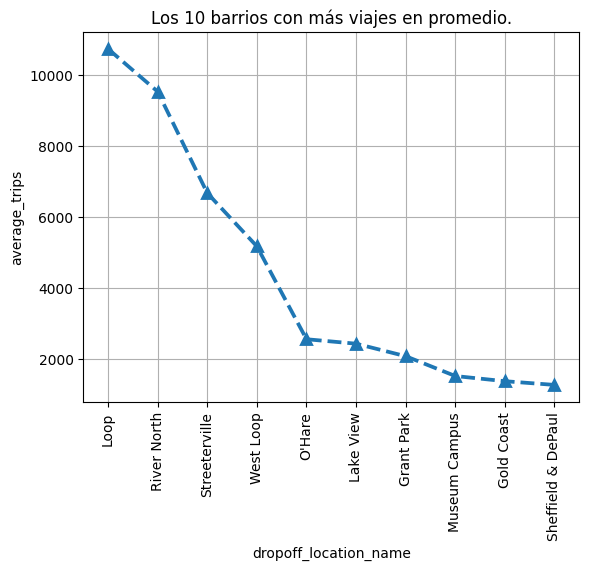

In [10]:
data = dropoff_trips.nlargest(10, 'average_trips')
 
sns.pointplot(x="dropoff_location_name",
               y="average_trips",
               data=data,
               markers="^",
               linestyles='--')
 
plt.xticks(rotation=90)
plt.title('Los 10 barrios con más viajes en promedio.')
 
plt.grid(True) 
plt.show()

### Empresas de taxis y números de viajes.

De acuerdo a la gráfica 1, podemos observar que la mayoría de los barrios tienen menos de 3,000 viajes en promedio. Por otro lado los barrios más concurridos son Loop, River North, Streetville y West Loop, Posiblemente son barrios que se encuentra en un centro financiero.

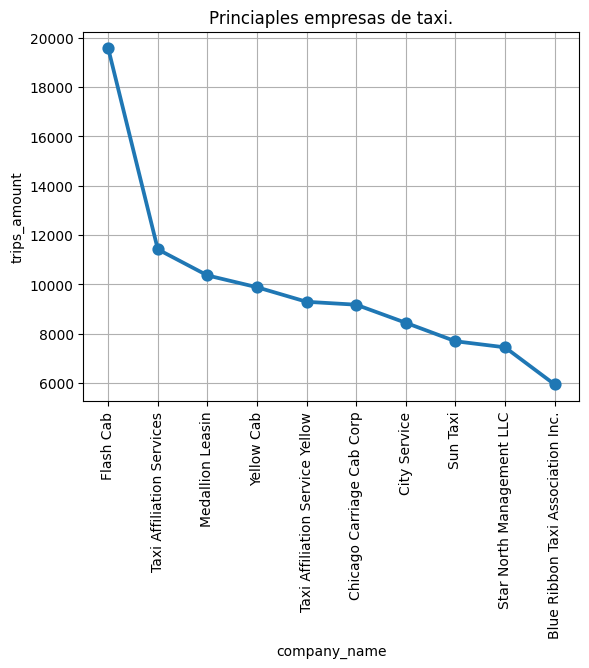

In [11]:
data = company_trips.nlargest(10, 'trips_amount')

sns.pointplot(x='company_name',
              y='trips_amount',
              data=data)

plt.xticks(rotation=90)
plt.title('Princiaples empresas de taxi.')

plt.grid(True)  
plt.show()

La compañia de taxis con mas viajes acumulados es `Flash Cab`, meintras que el resto tienen menos de 12,000 viajes. Segurmanete se están comparando empresas de taxi que son pequeñas, mediana y grandes ayq ue la diferencia es muy considerable.

## **Paso 4. Prueba de hipótesis.**

Probar la hipótesis:

La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos.

In [12]:
loop_to_airport = pd.read_csv('./7_gitignore/moved_project_sql_result_07.csv')

In [13]:
loop_to_airport.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [14]:
loop_to_airport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [15]:
loop_to_airport.describe(include='all')

,start_ts,weather_conditions,duration_seconds
count,1068,1068,1068.000000
unique,81,2,NaN
top,2017-11-11 10:00:00,Good,NaN
freq,48,888,NaN
mean,NaN,NaN,2071.731273
std,NaN,NaN,769.461125
min,NaN,NaN,0.000000
25%,NaN,NaN,1438.250000
50%,NaN,NaN,1980.000000
75%,NaN,NaN,2580.000000


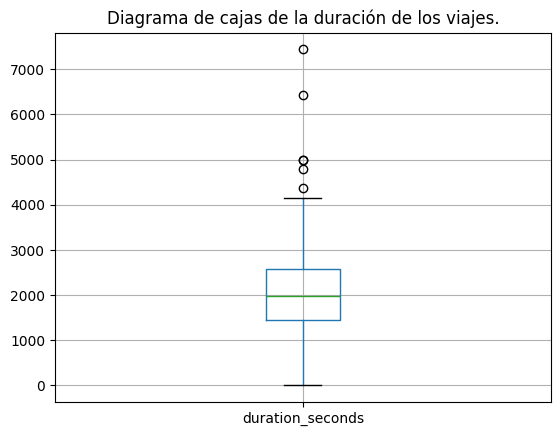

In [16]:
loop_to_airport.boxplot()

plt.title('Diagrama de cajas de la duración de los viajes.')
plt.grid(True)
plt.show()

En la descripción estadadística general. Observamos que a las 10 de la mñana del día 11 se registraron 48 viajes, de lo cuales ya mayoría se solicitaron cuando el día era bueno y el viaje en promedio es de 35 minutos aproximadamente. 
    
En al gáfica apreciamos que tenemos ciertos valores atípicos por arriba de los cuartiles. Díficlmente va a haber viajes en taxi de más de una hora.

In [17]:
loop_to_airport['start_ts'] = pd.to_datetime(loop_to_airport['start_ts'],format='ISO8601') #Convertimos la fecha en formato de fecha.
loop_to_airport['day'] = loop_to_airport['start_ts'].dt.day #Extraemos el dia de la fecha y lo registramos.
loop_to_airport['date'] = loop_to_airport['start_ts'].dt.date #Extraemos solo la fecha y lo registramos.

In [18]:
loop_to_airport.head()

,start_ts,weather_conditions,duration_seconds,day,date
0,2017-11-25 16:00:00,Good,2410.0,25,2017-11-25
1,2017-11-25 14:00:00,Good,1920.0,25,2017-11-25
2,2017-11-25 12:00:00,Good,1543.0,25,2017-11-25
3,2017-11-04 10:00:00,Good,2512.0,4,2017-11-04
4,2017-11-11 07:00:00,Good,1440.0,11,2017-11-11


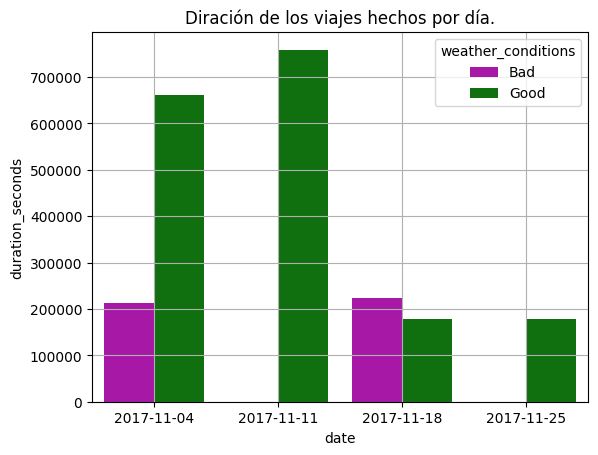

In [19]:
amount_trips_date = loop_to_airport.groupby(['date','weather_conditions']).sum(numeric_only=True).reset_index()

sns.barplot(x='date',
            y='duration_seconds',
            data=amount_trips_date,
            hue='weather_conditions',
           palette={"Good":"g",
                    "Bad":"m"}
           )

plt.title('Diración de los viajes hechos por día.')
plt.grid(True)
plt.show()

La gráfica expone claramente los días en el que la condicion climática era buena o mala, siendo los días 4 y 18 de noviembre un día con ambas condiciones. También se dientifica que el día con más duración total de viajes fue el día 4, sumando los viajes realizados en condiciones climáticas buenas y malas.

In [20]:
def grp_date_by_day(data, day=int()): #Función para graficar los días
    
    agg_func={'duration_seconds':'sum'}
    logical_mask = "day == @day"
    
    grp_by_date_day = data.query(logical_mask).groupby(['start_ts','weather_conditions']).agg(agg_func)
    data = grp_by_date_day.reset_index()
    data['hour'] = data['start_ts'].dt.hour

    sns.barplot(x='hour',
                y='duration_seconds',
                data=data,
                hue='weather_conditions',
                palette={"Good":"g",
                        "Bad":"m"})

    plt.xticks(rotation=90)
    plt.title(f'Duración total de los viajes hechos el día {day} de noviembre por hora.')
    plt.grid(True)
    plt.show()

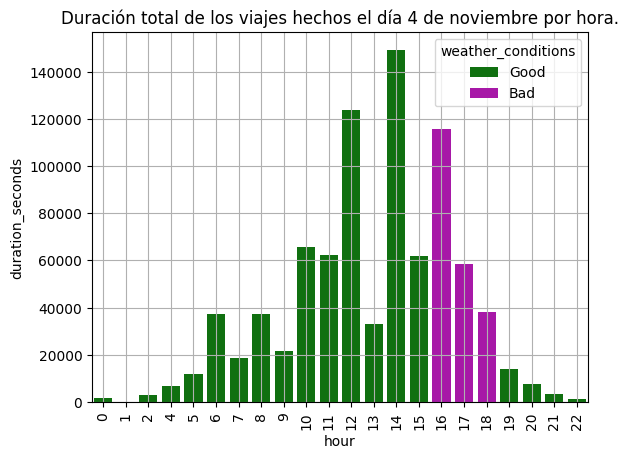

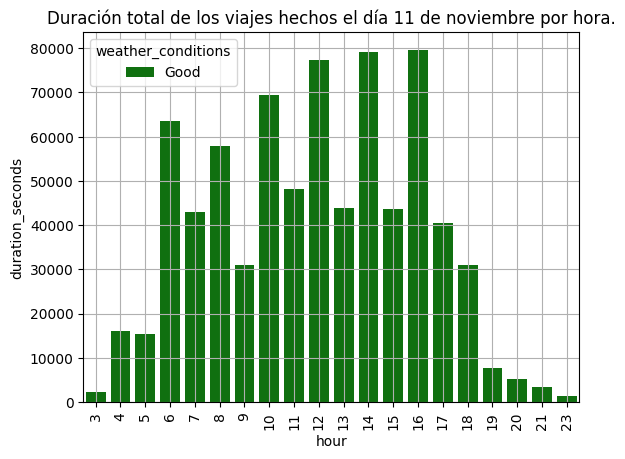

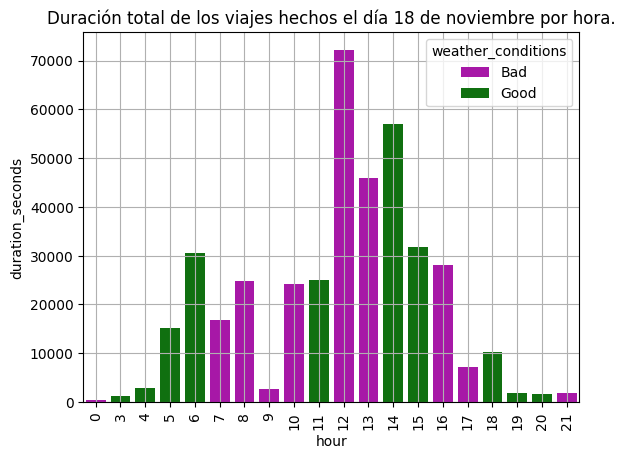

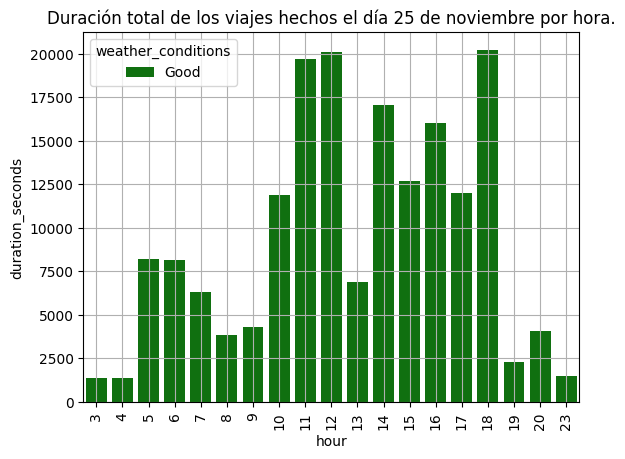

In [21]:
grp_date_by_day(loop_to_airport, day=4)

grp_date_by_day(loop_to_airport, day=11)

grp_date_by_day(loop_to_airport, day=18)

grp_date_by_day(loop_to_airport, day=25)

La gráfica del día 4, como ya mencionamos anterioremente, es un día que se registró como malo, climáticaemnte hablando. EL día solo fue malo durante 3 horas seguidas, de las 4 pm a 6 pm. La hora con mayor duración de viajes fue a las 2 pm.
    
El día 11 fue un día bastante ocupado a partir de las 6 am y  bajó la demanda de viajes por las 5 pm. 
    
El día 18, fue un dia curioso, ya qu al parecer estuvo nublado todo el día y llovia de manera esporádica. A las 12 pm fue la hora con mayor duración de viajes, aunque habiera estado lloviendo.

El dia 25 un dia bueno pero no con muchos viajes. La hora con mayor acumulación de duración de los viajes fueron a las 12 pm y 6pm. Muy tranquilo.

In [22]:
good_logical_mask = "weather_conditions == 'Good'"
bad_logical_mask = "weather_conditions == 'Bad'"

good_condition = loop_to_airport.query(good_logical_mask)['duration_seconds']
bad_condition = loop_to_airport.query(bad_logical_mask)['duration_seconds']

var_good_condition = round(np.var(good_condition),2)
var_bad_condition = round(np.var(bad_condition),2)

print(f'La varinza de la duración de los viajes en buenas condiciones climáticas es: {var_good_condition}')
print(f'La varinza de la duración de los viajes en malas condiciones climáticas es: {var_bad_condition}\n')


if (1-(var_bad_condition/var_good_condition)) <= 0.05:
    print(f'Las varianzas de los condiciones climáticas son aproximadamente iguales.\n')
else:
    print(f'Las varianzas de las condiciones climaticas no son iguales.\n')
    
alpha = 0.05  # el nivel de significancia estadística crítica
# si el valor p es menor que alpha, rechazamos la hipótesis
    
results = st.ttest_ind(good_condition, bad_condition,equal_var=False)

print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula\n")
    

La varinza de la duración de los viajes en buenas condiciones climáticas es: 575732.93
La varinza de la duración de los viajes en malas condiciones climáticas es: 517403.56

Las varianzas de las condiciones climaticas no son iguales.

valor p:  6.738994326108734e-12
Rechazamos la hipótesis nula


Rechazamos la hipotesis nula de que los vuelos cambian según el día es lluvios o no. Por lo tanto, no cambian.

En las dos hipótesis aplicamos la igualdad de las medias de dos poblaciones.

Probamos la hipótesis de que las medias de dos poblaciones son iguales según las muetras aplicadas a ellas con la función `st.ttest_ind()`, donde los parámetros necesarios son `población_1` & `población_2` que son matrices que contien muestras y `equal_var` que es un parámetro opcional que especifica si las varianzas de las poblaciones deben considerarse iguales o no. Para determinar si las varianzas son aproximadamente iguales las varianza no puede ser 5% mayor a la de la varianza mayor. Aplicamos una condición para determinar si son iguales o no. El resultado que se obtuvo fue que las ninguna de la varianzas de las dos hipótesis son iguales; por lo tanto `equal_var=False`.

## Conclusiones generales del proyecto.

No todos los datos que tengamos puede ser suficiente para llegar a los resultados deseados y tenemos que obtenerlos de bases de datos y `SQL` hacen que la tereas sean fáciles para obtenerlos. De igual forma ahí podemos preprocesar los datos para posteriormente enforcarnos únicamente en el análisis de los datos al trabajar con `Python`.